# TensorFlow by Isha Borgaonkar 

##  Installation & Setup

In [2]:
# Install TensorFlow for deep learning, matplotlib for plotting,
# tensorflow-addons for extra layers/optimizers, and keras-tuner for hyperparameter search
!pip install tensorflow matplotlib tensorflow-addons keras-tuner

## Imports & Environment Check

In [4]:
# Core TensorFlow imports
import tensorflow as tf                        # Core TensorFlow library
from tensorflow import keras                   # High-level Keras API
from tensorflow.keras import layers, models, callbacks

# Plotting and array utilities
import matplotlib.pyplot as plt                # For visualizing results
import numpy as np                             # For numerical operations

# Optional: Keras Tuner for hyperparameter search
try:
    import kerastuner as kt                    # install with: pip install keras-tuner
    print("Keras Tuner version:", kt.__version__)
except ModuleNotFoundError:
    print("⚠️ keras-tuner not found. Install with:\n    pip install keras-tuner")

# Confirm TensorFlow version
print("TensorFlow version:", tf.__version__)


Keras Tuner version: 1.0.5
TensorFlow version: 2.16.1


In [5]:
# Core TensorFlow imports
import tensorflow as tf                        # Core TensorFlow library
from tensorflow import keras                   # High-level Keras API
from tensorflow.keras import layers, models, callbacks

# Plotting and array utilities
import matplotlib.pyplot as plt                # For visualizing results
import numpy as np                             # For numerical operations

# Optional: Keras Tuner for hyperparameter search
try:
    import kerastuner as kt                    # install with: pip install keras-tuner
    print("Keras Tuner version:", kt.__version__)
except ModuleNotFoundError:
    print("⚠️ keras-tuner not found. Install with:\n    pip install keras-tuner")

# Confirm TensorFlow version
print("TensorFlow version:", tf.__version__)


Keras Tuner version: 1.0.5
TensorFlow version: 2.16.1


##  Loading & Exploring Data

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


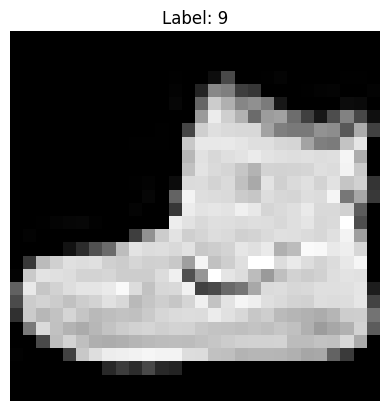

In [6]:
# Load Fashion MNIST: grayscale 28×28 images in 10 classes
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Print shapes to verify dataset dimensions
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Display the first image with its label
plt.imshow(x_train[0], cmap='gray')           # Show pixel intensities as grayscale
plt.title("Label: " + str(y_train[0]))         # Show its numeric class label
plt.axis('off')                                # Hide axis ticks
plt.show()


## Preprocessing Pipeline

In [7]:
# Normalize pixel values from [0,255] → [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Add channel dimension: (28,28) → (28,28,1) required by Conv2D
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test,  -1)

# Convert labels to one-hot encoded vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)


## Building a CNN from Scratch

In [9]:
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # Convolutional layer
        layers.MaxPooling2D((2,2)),                                          # Max pooling layer
        layers.Conv2D(64, (3,3), activation='relu'),                         # Another Conv layer
        layers.MaxPooling2D((2,2)),                                          # Another pooling layer
        layers.Flatten(),                                                    # Flatten to 1D vector
        layers.Dense(128, activation='relu'),                                # Fully connected layer
        layers.Dropout(0.5),                                                 # Dropout for regularization
        layers.Dense(num_classes, activation='softmax')                      # Output layer with softmax
    ])
    # Compile model with optimizer, loss, and metric
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Instantiate and view model architecture
cnn = build_cnn()
cnn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Training with Callbacks

In [20]:
# EarlyStopping: stop training when validation loss stops improving for 3 epochs
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# TensorBoard: log training metrics and histograms for inspection
tensorboard_cb = callbacks.TensorBoard(
    log_dir="logs",
    histogram_freq=1
)

# ModelCheckpoint: save the best model (in Keras’s native format) by validation accuracy
# Note: Keras now requires the .keras extension for full model saving
mc = callbacks.ModelCheckpoint(
    filepath='best_model.keras',    # Must end in .keras when save_weights_only=False
    monitor='val_accuracy',         # Which metric to monitor
    save_best_only=True             # Only save when the monitored metric improves
)

# Train the model with a 10% validation split and the above callbacks
history = cnn.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop, tensorboard_cb, mc]
)


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.6682 - loss: 0.9230 - val_accuracy: 0.8465 - val_loss: 0.4107
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8411 - loss: 0.4350 - val_accuracy: 0.8757 - val_loss: 0.3348
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8653 - loss: 0.3777 - val_accuracy: 0.8808 - val_loss: 0.3150
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8789 - loss: 0.3390 - val_accuracy: 0.8880 - val_loss: 0.2958
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.8867 - loss: 0.3140 - val_accuracy: 0.8917 - val_loss: 0.2889
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8906 - loss: 0.2993 - val_accuracy: 0.8985 - val_loss: 0.2747
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8959 - loss: 0.2828 - val_accuracy: 0.8993 - val_loss: 0.2712
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9030 - loss: 0.2642 - 

## Visualizing Training with TensorBoard
```bash
tensorboard --logdir logs
```

## Evaluation & Metrics

In [10]:
# Evaluate on test set
test_loss, test_acc = cnn.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


Test Accuracy: 0.0950, Test Loss: 2.3203


## Data Augmentation

In [23]:
# Configure image augmentations
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15, width_shift_range=0.1, height_shift_range=0.1,
    zoom_range=0.1, horizontal_flip=True
)
datagen.fit(x_train)

# Train with augmented data
aug_cnn = build_cnn()
aug_history = aug_cnn.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, mc]
)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - accuracy: 0.5498 - loss: 1.2255 - val_accuracy: 0.7745 - val_loss: 0.5772
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.7418 - loss: 0.6943 - val_accuracy: 0.8001 - val_loss: 0.5295
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.7594 - loss: 0.6299 - val_accuracy: 0.8259 - val_loss: 0.4570


## Hyperparameter Tuning with Keras Tuner

In [11]:
def model_builder(hp):
    # Number of units in dense layer
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    # Learning rate options
    hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model = build_cnn()
    # Modify dense layer units
    model.layers[-2] = layers.Dense(hp_units, activation='relu')
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_lr),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Run random search
tuner = kt.RandomSearch(model_builder, objective='val_accuracy', max_trials=5, executions_per_trial=1)
tuner.search(x_train, y_train, epochs=5, validation_split=0.1)
best_model = tuner.get_best_models(num_models=1)[0]


Reloading Tuner from .\untitled_project\tuner0.json



C:\Users\ISHA\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


## Transfer Learning (Advanced)

In [26]:
# Load pretrained MobileNetV2 (no top)
base = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(96,96,3))
base.trainable = False  # Freeze base

# Build new model on top
tl_model = models.Sequential([
    layers.UpSampling2D((12,12)),    # Upsample input
    base,                             # Pretrained base
    layers.GlobalAveragePooling2D(),  # Pool features
    layers.Dense(64, activation='relu'),  
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])
tl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
tl_model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ up_sampling2d (UpSampling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_96 (Functional)     │ ?                           │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

##  Custom Training Loop with tf.GradientTape

In [27]:
# Define optimizer and loss
optimizer = keras.optimizers.Adam()
loss_fn = keras.losses.CategoricalCrossentropy()

# Create batched dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(128)

for epoch in range(5):
    for images, labels in train_ds:
        # Record operations
        with tf.GradientTape() as tape:
            preds = cnn(images, training=True)
            loss = loss_fn(labels, preds)
        # Compute gradients
        grads = tape.gradient(loss, cnn.trainable_variables)
        # Apply gradients
        optimizer.apply_gradients(zip(grads, cnn.trainable_variables))
    print(f"Epoch {epoch+1}, Loss: {loss:.4f}")


Epoch 1, Loss: 0.4342
Epoch 2, Loss: 0.3407
Epoch 3, Loss: 0.3133
Epoch 4, Loss: 0.3123
Epoch 5, Loss: 0.2056


##  Mixed Precision & Multi-GPU Strategy

In [28]:
# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Use all GPUs
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    dist_model = build_cnn()
    dist_model.fit(x_train, y_train, epochs=3, batch_size=256)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 474s 2s/step - accuracy: 0.6135 - loss: 1.0769
Epoch 2/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.8250 - loss: 0.4886
Epoch 3/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.8517 - loss: 0.4115
